<img src="https://thevalley.es/wp-content/uploads/2016/11/thevalley-logo-negro.png" width="400"></img>

# Reto idealista, ¿cuánto vale mi piso?

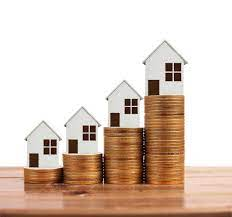


Notebook por: **David Rey**






# Carga de librerías

Cargamos las librerías en nuestro colab, como algunos paquetes no los tenemos instalados realizamos la instalación utilizando [pip](https://packaging.python.org/tutorials/installing-packages/).

In [2]:
import rtree
#import pygeos
import geopandas
from geopandas import GeoDataFrame
from shapely import wkt
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
from IPython.display import display, HTML

In [ ]:
import sys

sys.path.append("../src")

# Carga de datos

## Datos de anuncios de idealista

### Anuncios de venta en Barcelona

In [ ]:
# Cargamos los datos de anuncios
anuncios_barcelona = pd.read_csv('https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/assets/es_home_sale_Barcelona_2018.csv.gz', sep=";")
anuncios_barcelona.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,...,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_DIAGONAL,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
0,A11898131848556022319,201803,323000,3845.238095,HOME,SALE,84,4,1,1,...,0,1,1.876290,0.354004,1.475264,2.149566,41.380027,Barcelona,HOME,SALE
1,A18099432772155664747,201803,217000,2583.333333,HOME,SALE,84,3,2,0,...,0,1,2.118595,0.284372,1.194261,2.145689,41.381632,Barcelona,HOME,SALE
2,A2003099089407882787,201803,114000,1407.407407,HOME,SALE,81,2,1,0,...,1,0,4.127099,0.261574,2.504982,2.173891,41.423929,Barcelona,HOME,SALE
3,A1010373782315301134,201803,378000,4784.810127,HOME,SALE,79,2,1,0,...,0,1,2.238113,0.158527,0.795605,2.143379,41.384923,Barcelona,HOME,SALE
4,A12978912200216838006,201803,434000,3909.909910,HOME,SALE,111,4,2,1,...,0,1,2.333066,0.101568,1.200265,2.143230,41.381076,Barcelona,HOME,SALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61486 entries, 0 to 61485
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ASSETID                        61486 non-null  object 
 1   PERIOD                         61486 non-null  int64  
 2   PRICE                          61486 non-null  int64  
 3   UNITPRICE                      61486 non-null  float64
 4   ADTYPOLOGYID                   61486 non-null  object 
 5   ADOPERATIONID                  61486 non-null  object 
 6   CONSTRUCTEDAREA                61486 non-null  int64  
 7   ROOMNUMBER                     61486 non-null  int64  
 8   BATHNUMBER                     61486 non-null  int64  
 9   HASTERRACE                     61486 non-null  int64  
 10  HASLIFT                        61486 non-null  int64  
 11  HASAIRCONDITIONING             61486 non-null  int64  
 12  AMENITYID                      61486 non-null 

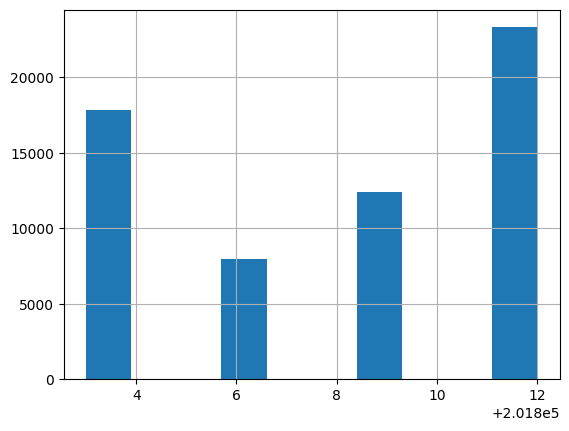

Distribution of 'PRICE':
count    6.148600e+04
mean     3.957706e+05
std      2.815548e+05
min      3.700000e+04
25%      2.300000e+05
50%      3.250000e+05
75%      4.620000e+05
max      4.866000e+06
Name: PRICE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


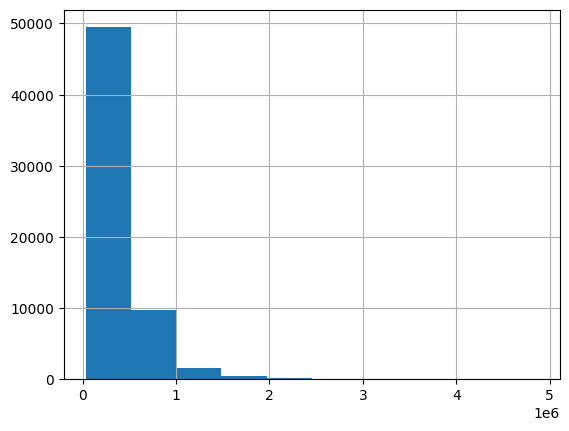

Distribution of 'UNITPRICE':
count    61486.000000
mean      4044.864609
std       1190.890791
min       1203.703704
25%       3202.574410
50%       3991.341829
75%       4841.463415
max       6996.688742
Name: UNITPRICE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


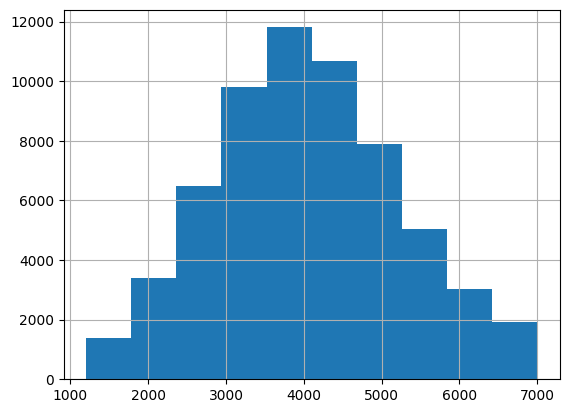

Distribution of 'CONSTRUCTEDAREA':
count    61486.000000
mean        95.460284
std         52.577355
min         21.000000
25%         66.000000
50%         82.000000
75%        108.000000
max        959.000000
Name: CONSTRUCTEDAREA, dtype: float64
Axes(0.125,0.11;0.775x0.77)


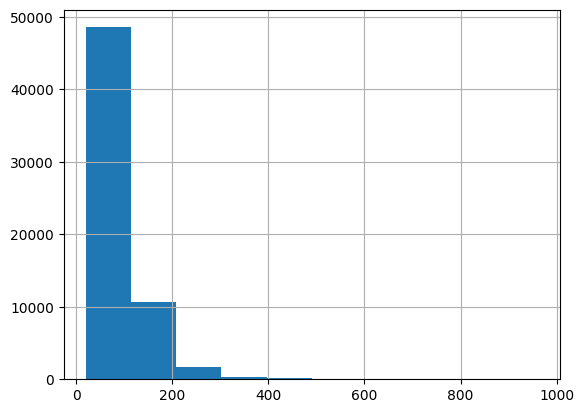

Distribution of 'ROOMNUMBER':
count    61486.000000
mean         2.864229
std          1.132634
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         40.000000
Name: ROOMNUMBER, dtype: float64
Axes(0.125,0.11;0.775x0.77)


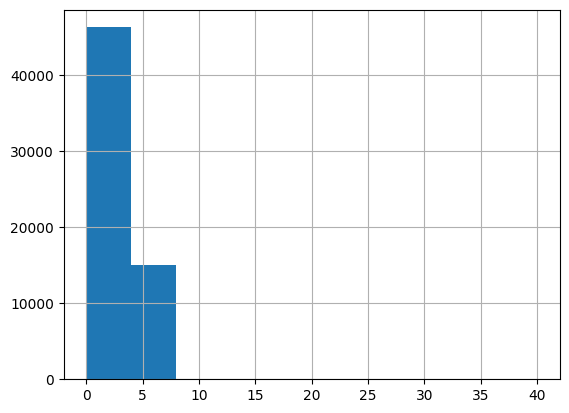

Distribution of 'BATHNUMBER':
count    61486.000000
mean         1.518736
std          0.711525
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: BATHNUMBER, dtype: float64
Axes(0.125,0.11;0.775x0.77)


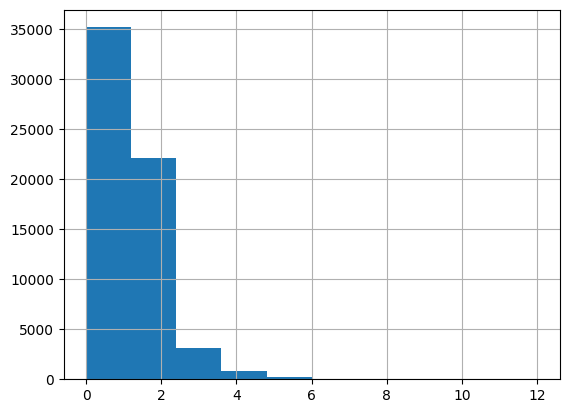

Distribution of 'HASTERRACE':
count    61486.000000
mean         0.329913
std          0.470185
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HASTERRACE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


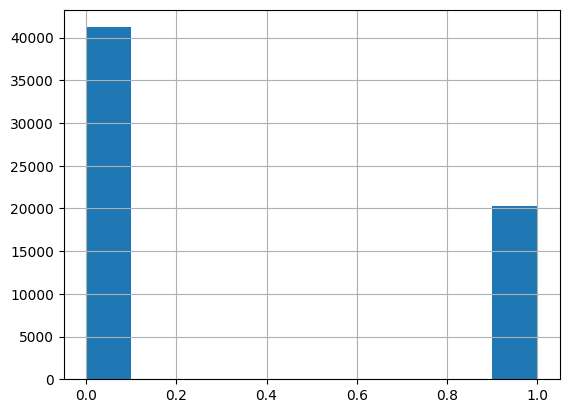

Distribution of 'HASLIFT':
count    61486.000000
mean         0.742559
std          0.437228
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HASLIFT, dtype: float64
Axes(0.125,0.11;0.775x0.77)


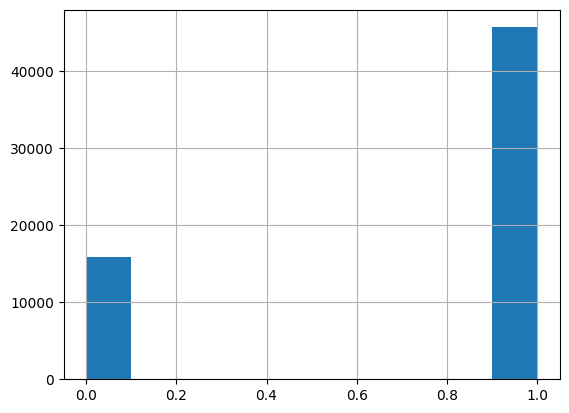

Distribution of 'HASAIRCONDITIONING':
count    61486.000000
mean         0.469912
std          0.499098
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HASAIRCONDITIONING, dtype: float64
Axes(0.125,0.11;0.775x0.77)


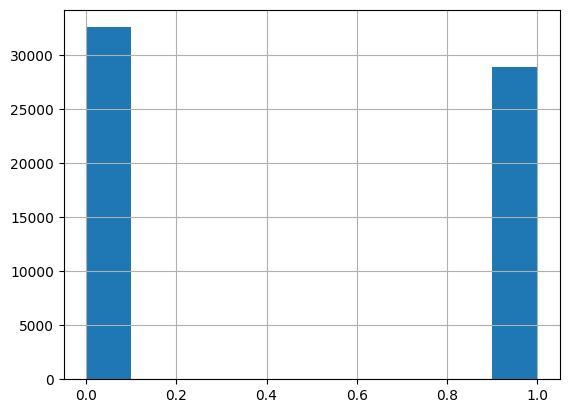

Distribution of 'AMENITYID':
count    61486.000000
mean         2.861139
std          0.450536
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: AMENITYID, dtype: float64
Axes(0.125,0.11;0.775x0.77)


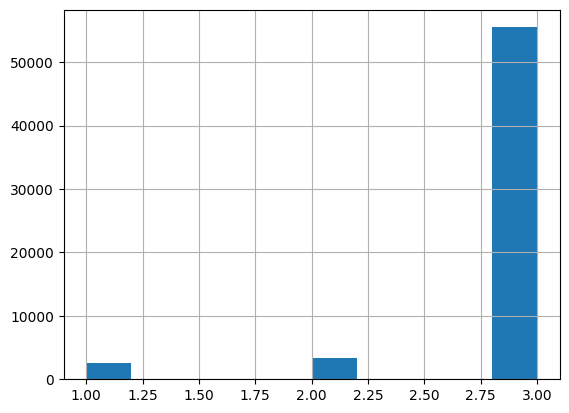

Distribution of 'HASPARKINGSPACE':
count    61486.000000
mean         0.079660
std          0.270769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASPARKINGSPACE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


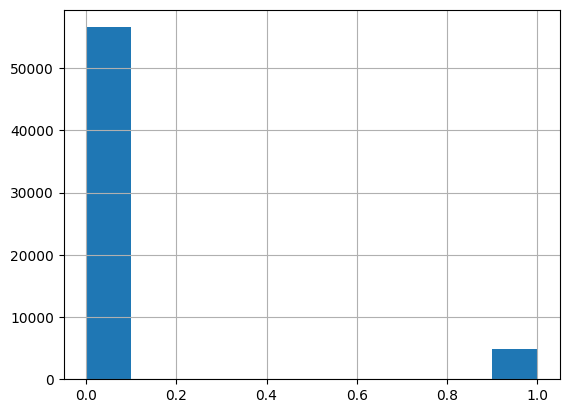

Distribution of 'ISPARKINGSPACEINCLUDEDINPRICE':
count    61486.000000
mean         0.079660
std          0.270769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ISPARKINGSPACEINCLUDEDINPRICE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


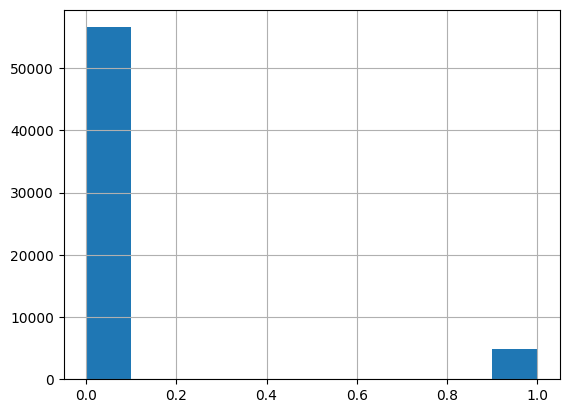

Distribution of 'PARKINGSPACEPRICE':
count     61486.000000
mean        620.405296
std        4896.313505
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      425001.000000
Name: PARKINGSPACEPRICE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


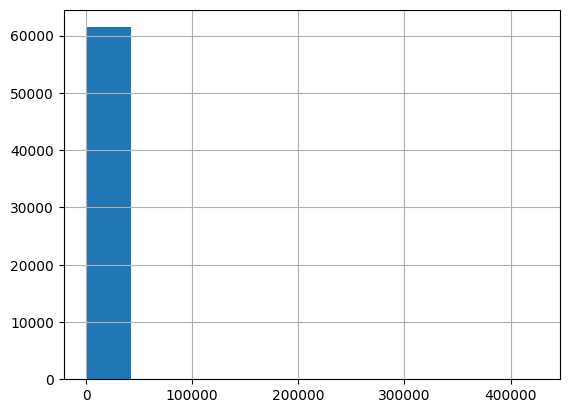

Distribution of 'HASNORTHORIENTATION':
count    61486.000000
mean         0.129281
std          0.335514
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASNORTHORIENTATION, dtype: float64
Axes(0.125,0.11;0.775x0.77)


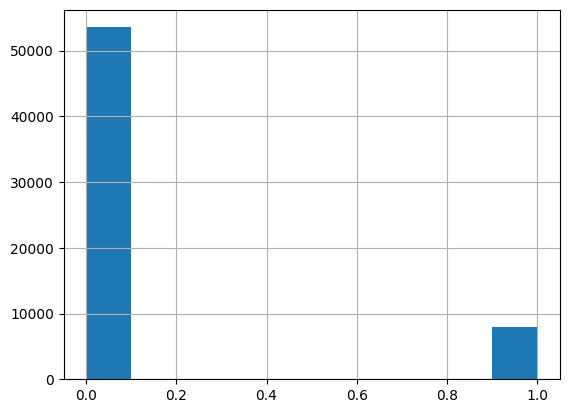

Distribution of 'HASSOUTHORIENTATION':
count    61486.000000
mean         0.306184
std          0.460911
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HASSOUTHORIENTATION, dtype: float64
Axes(0.125,0.11;0.775x0.77)


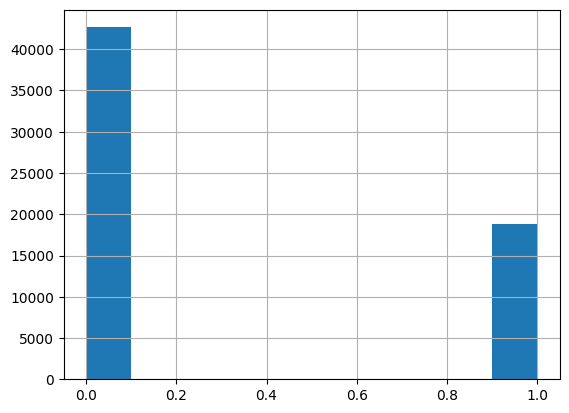

Distribution of 'HASEASTORIENTATION':
count    61486.000000
mean         0.238786
std          0.426345
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASEASTORIENTATION, dtype: float64
Axes(0.125,0.11;0.775x0.77)


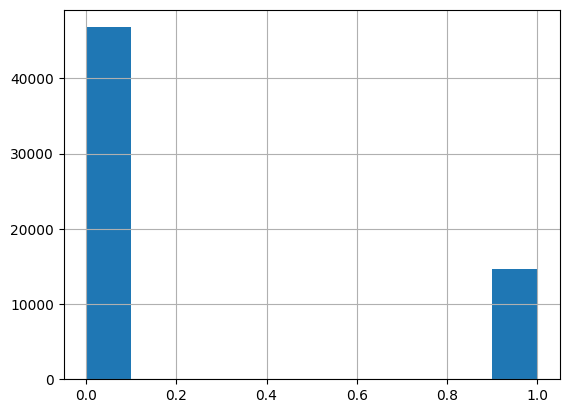

Distribution of 'HASWESTORIENTATION':
count    61486.000000
mean         0.155873
std          0.362738
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASWESTORIENTATION, dtype: float64
Axes(0.125,0.11;0.775x0.77)


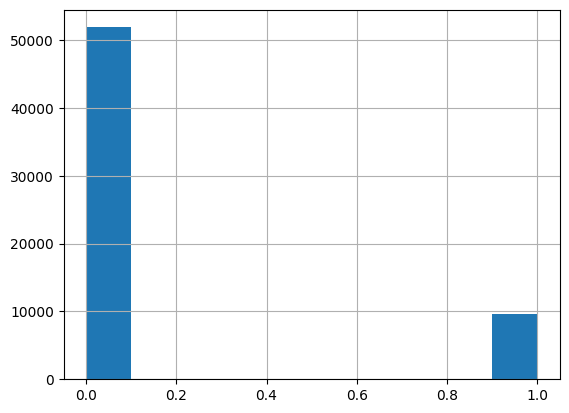

Distribution of 'HASBOXROOM':
count    61486.000000
mean         0.117084
std          0.321522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASBOXROOM, dtype: float64
Axes(0.125,0.11;0.775x0.77)


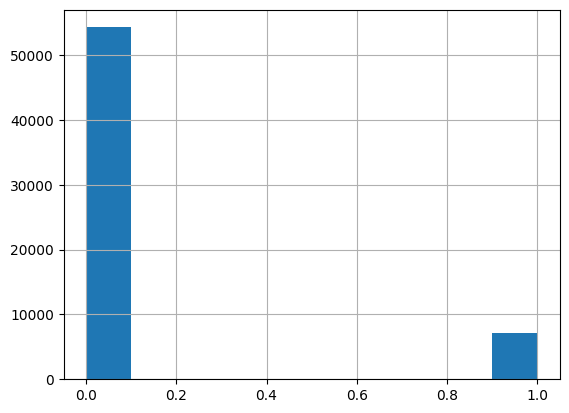

Distribution of 'HASWARDROBE':
count    61486.000000
mean         0.298328
std          0.457528
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HASWARDROBE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


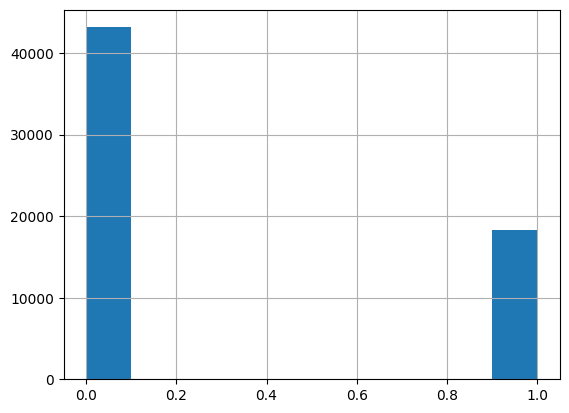

Distribution of 'HASSWIMMINGPOOL':
count    61486.000000
mean         0.027827
std          0.164480
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASSWIMMINGPOOL, dtype: float64
Axes(0.125,0.11;0.775x0.77)


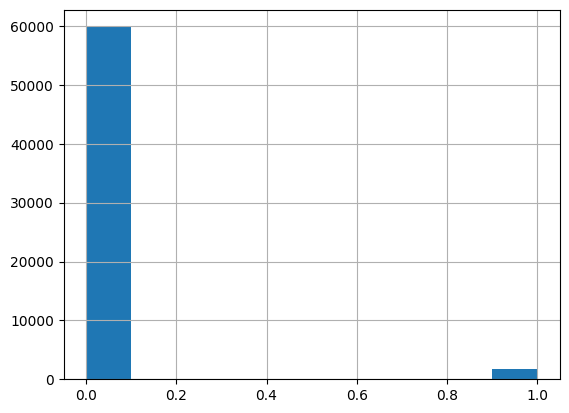

Distribution of 'HASDOORMAN':
count    61486.000000
mean         0.084247
std          0.277760
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASDOORMAN, dtype: float64
Axes(0.125,0.11;0.775x0.77)


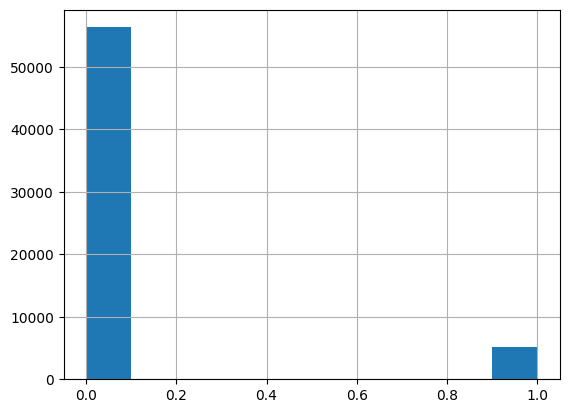

Distribution of 'HASGARDEN':
count    61486.000000
mean         0.036870
std          0.188445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: HASGARDEN, dtype: float64
Axes(0.125,0.11;0.775x0.77)


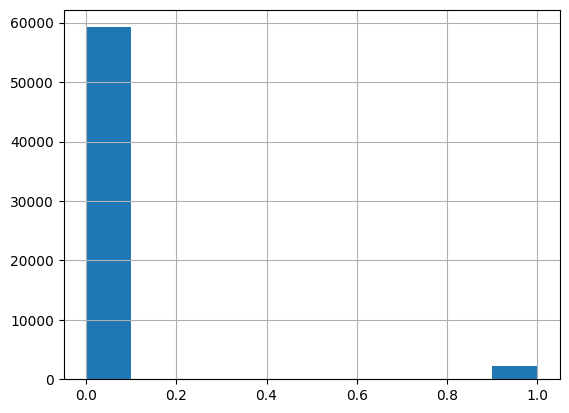

Distribution of 'ISDUPLEX':
count    61486.000000
mean         0.027340
std          0.163072
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ISDUPLEX, dtype: float64
Axes(0.125,0.11;0.775x0.77)


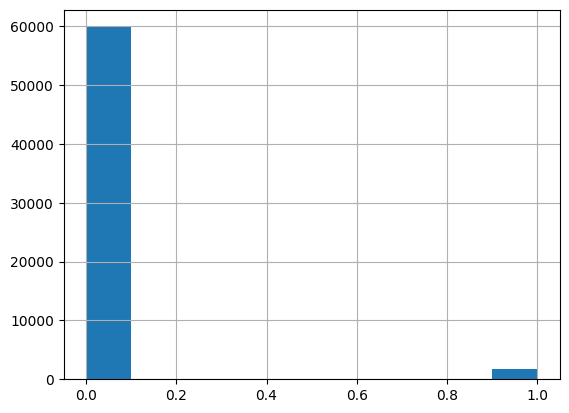

Distribution of 'ISSTUDIO':
count    61486.000000
mean         0.017370
std          0.130646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ISSTUDIO, dtype: float64
Axes(0.125,0.11;0.775x0.77)


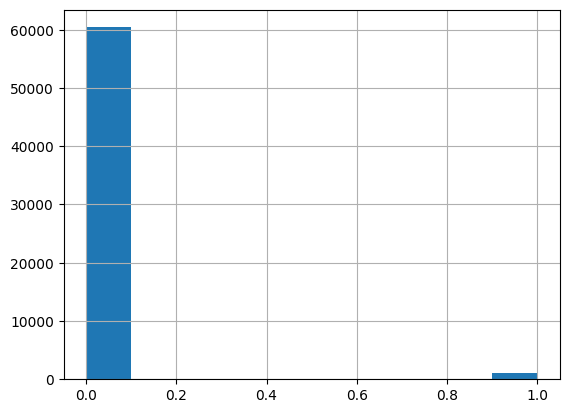

Distribution of 'ISINTOPFLOOR':
count    61486.000000
mean         0.020200
std          0.140684
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ISINTOPFLOOR, dtype: float64
Axes(0.125,0.11;0.775x0.77)


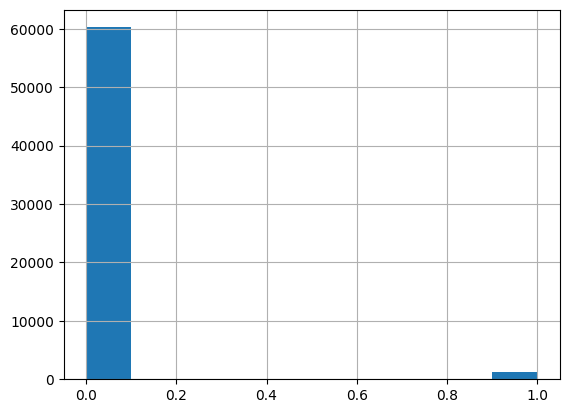

Distribution of 'CONSTRUCTIONYEAR':
count    38512.00000
mean      1952.57808
std         49.82782
min         19.00000
25%       1934.00000
50%       1965.00000
75%       1975.00000
max       2093.00000
Name: CONSTRUCTIONYEAR, dtype: float64
Axes(0.125,0.11;0.775x0.77)


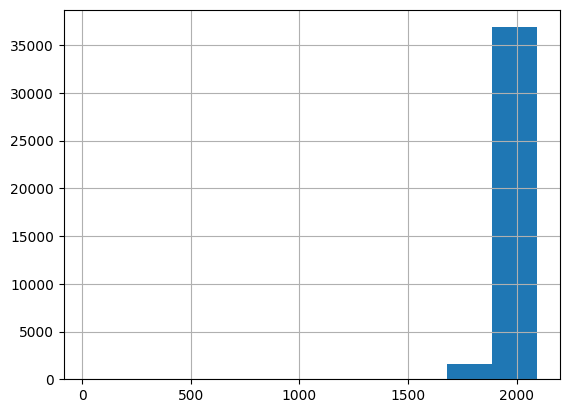

Distribution of 'FLOORCLEAN':
count    57233.000000
mean         2.869778
std          2.204053
min         -1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         11.000000
Name: FLOORCLEAN, dtype: float64
Axes(0.125,0.11;0.775x0.77)


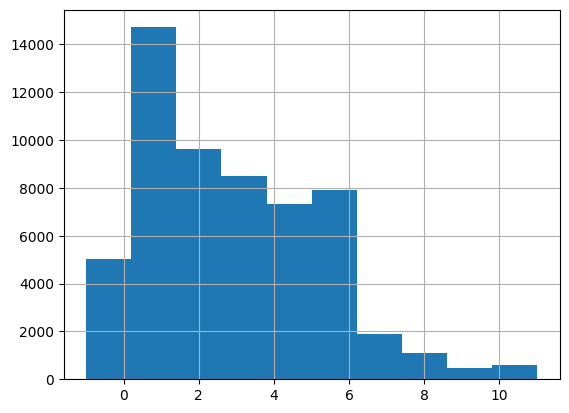

Distribution of 'FLATLOCATIONID':
count    53714.000000
mean         1.089809
std          0.285911
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: FLATLOCATIONID, dtype: float64
Axes(0.125,0.11;0.775x0.77)


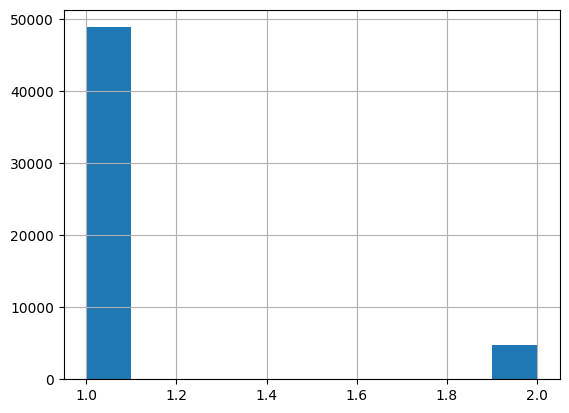

Distribution of 'CADCONSTRUCTIONYEAR':
count    61486.000000
mean      1952.186498
std         37.343798
min       1588.000000
25%       1932.000000
50%       1963.000000
75%       1974.000000
max       2018.000000
Name: CADCONSTRUCTIONYEAR, dtype: float64
Axes(0.125,0.11;0.775x0.77)


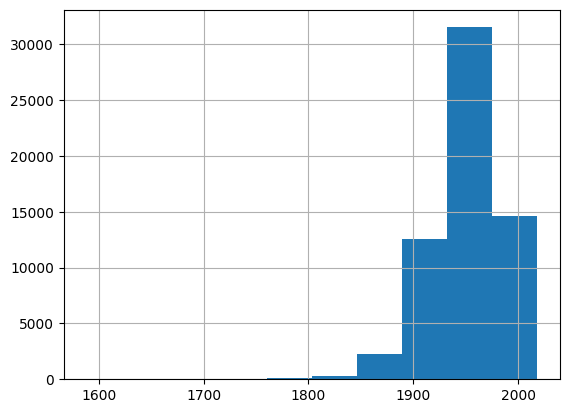

Distribution of 'CADMAXBUILDINGFLOOR':
count    61486.000000
mean         6.846892
std          2.680597
min          0.000000
25%          5.000000
50%          6.000000
75%          9.000000
max         34.000000
Name: CADMAXBUILDINGFLOOR, dtype: float64
Axes(0.125,0.11;0.775x0.77)


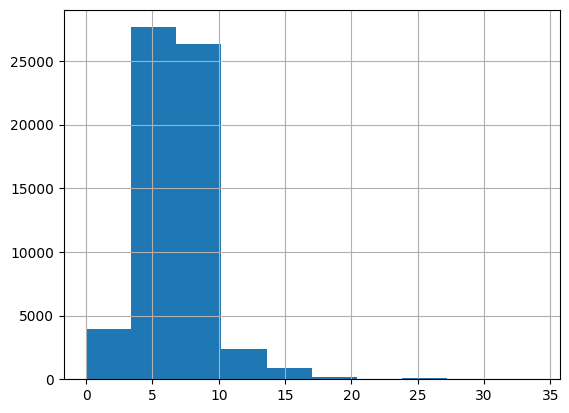

Distribution of 'CADDWELLINGCOUNT':
count    61486.000000
mean        28.562437
std         41.297357
min          1.000000
25%         11.000000
50%         17.000000
75%         31.000000
max        505.000000
Name: CADDWELLINGCOUNT, dtype: float64
Axes(0.125,0.11;0.775x0.77)


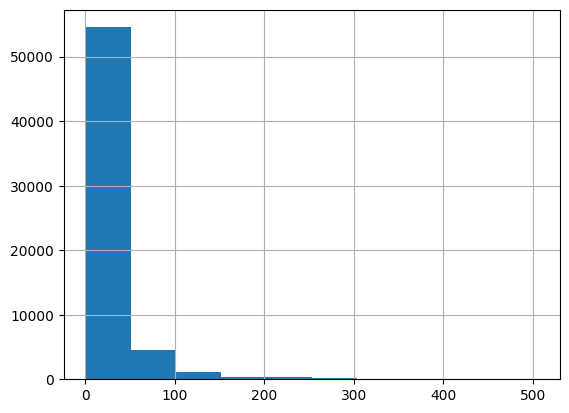

Distribution of 'CADASTRALQUALITYID':
count    61486.000000
mean         4.309778
std          1.299794
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: CADASTRALQUALITYID, dtype: float64
Axes(0.125,0.11;0.775x0.77)


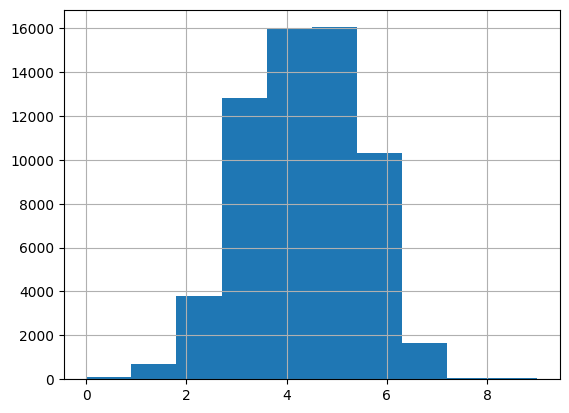

Distribution of 'BUILTTYPEID_1':
count    61486.000000
mean         0.012247
std          0.109986
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: BUILTTYPEID_1, dtype: float64
Axes(0.125,0.11;0.775x0.77)


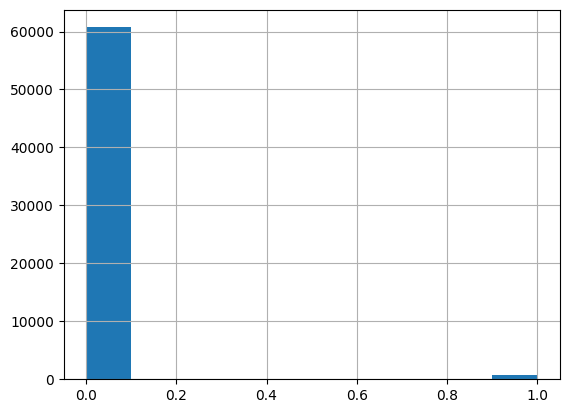

Distribution of 'BUILTTYPEID_2':
count    61486.000000
mean         0.171047
std          0.376553
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: BUILTTYPEID_2, dtype: float64
Axes(0.125,0.11;0.775x0.77)


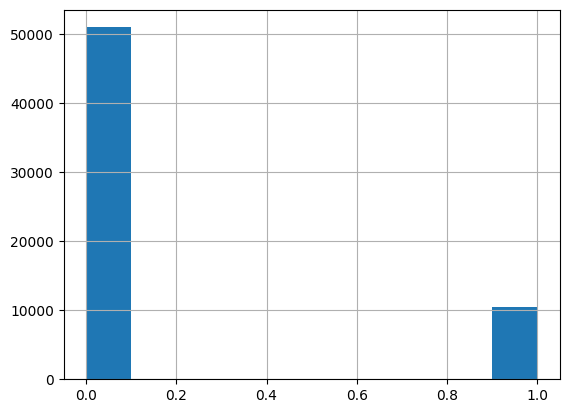

Distribution of 'BUILTTYPEID_3':
count    61486.000000
mean         0.816706
std          0.386910
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: BUILTTYPEID_3, dtype: float64
Axes(0.125,0.11;0.775x0.77)


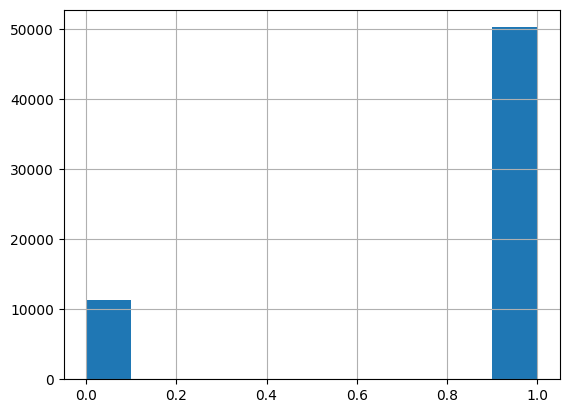

Distribution of 'DISTANCE_TO_CITY_CENTER':
count    61486.000000
mean         2.803639
std          1.564663
min          0.054566
25%          1.562966
50%          2.615978
75%          3.777659
max          9.057571
Name: DISTANCE_TO_CITY_CENTER, dtype: float64
Axes(0.125,0.11;0.775x0.77)


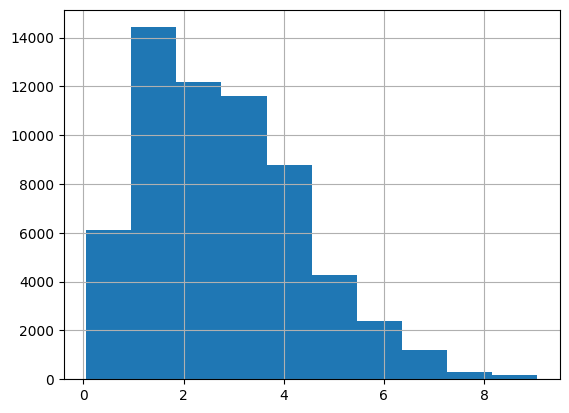

Distribution of 'DISTANCE_TO_METRO':
count    61486.000000
mean         0.265622
std          0.164060
min          0.000736
25%          0.155199
50%          0.246359
75%          0.346252
max          4.099629
Name: DISTANCE_TO_METRO, dtype: float64
Axes(0.125,0.11;0.775x0.77)


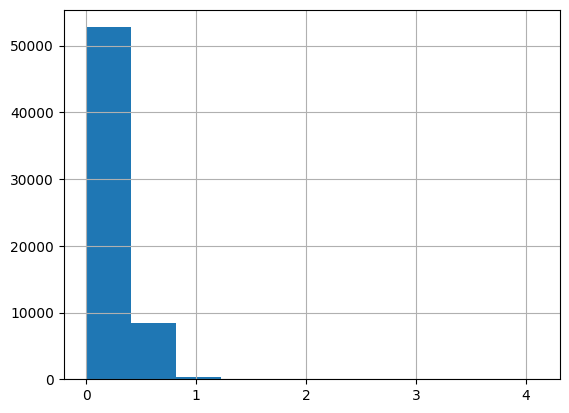

Distribution of 'DISTANCE_TO_DIAGONAL':
count    61486.000000
mean         1.769907
std          1.145957
min          0.002235
25%          0.900254
50%          1.646425
75%          2.383208
max          7.244329
Name: DISTANCE_TO_DIAGONAL, dtype: float64
Axes(0.125,0.11;0.775x0.77)


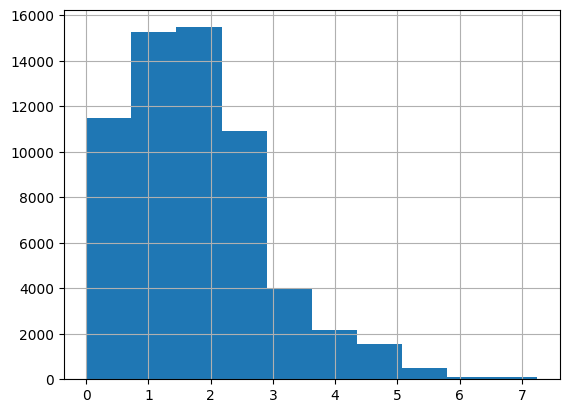

Distribution of 'LONGITUDE':
count    61486.000000
mean         2.165723
std          0.021643
min          2.091586
25%          2.148810
50%          2.166879
75%          2.180324
max          2.221874
Name: LONGITUDE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


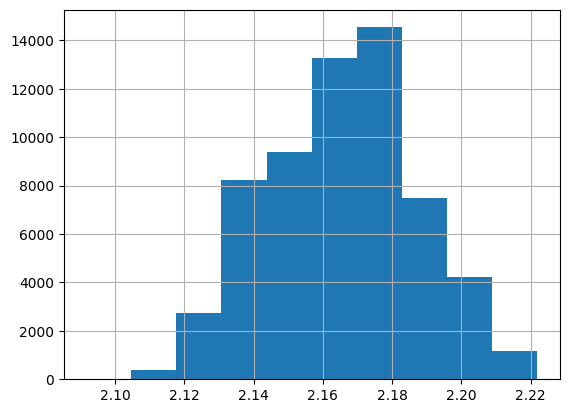

Distribution of 'LATITUDE':
count    61486.000000
mean        41.398977
std          0.020336
min         41.325763
25%         41.381453
50%         41.398161
75%         41.412011
max         41.467767
Name: LATITUDE, dtype: float64
Axes(0.125,0.11;0.775x0.77)


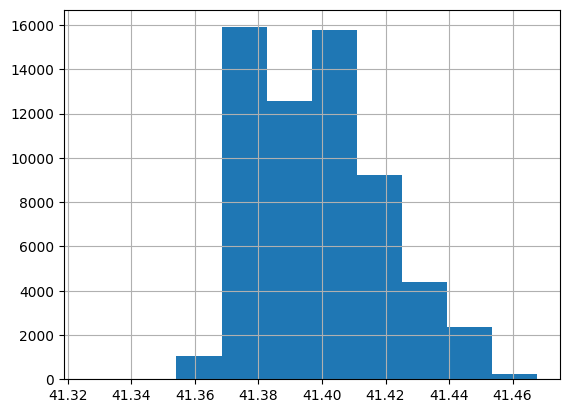

In [ ]:
display(HTML(anuncios_barcelona.to_html()))

In [ ]:
anuncios_barcelona.head()

#### Listado de variables

In [ ]:
# generamos la lista de variables del conjunto
for col in anuncios_barcelona.columns:
    print(col)

ASSETID
PERIOD
PRICE
UNITPRICE
ADTYPOLOGYID
ADOPERATIONID
CONSTRUCTEDAREA
ROOMNUMBER
BATHNUMBER
HASTERRACE
HASLIFT
HASAIRCONDITIONING
AMENITYID
HASPARKINGSPACE
ISPARKINGSPACEINCLUDEDINPRICE
PARKINGSPACEPRICE
HASNORTHORIENTATION
HASSOUTHORIENTATION
HASEASTORIENTATION
HASWESTORIENTATION
HASBOXROOM
HASWARDROBE
HASSWIMMINGPOOL
HASDOORMAN
HASGARDEN
ISDUPLEX
ISSTUDIO
ISINTOPFLOOR
CONSTRUCTIONYEAR
FLOORCLEAN
FLATLOCATIONID
CADCONSTRUCTIONYEAR
CADMAXBUILDINGFLOOR
CADDWELLINGCOUNT
CADASTRALQUALITYID
BUILTTYPEID_1
BUILTTYPEID_2
BUILTTYPEID_3
DISTANCE_TO_CITY_CENTER
DISTANCE_TO_METRO
DISTANCE_TO_DIAGONAL
LONGITUDE
LATITUDE
CITYNAME
ADTYPOLOGY
ADOPERATION


Descriptivos básicos (hay un error con el campo **-IMPUTED_YEAR**)

In [ ]:
anuncios_barcelona.describe()

### Anuncios de venta en Madrid

In [ ]:
# Cargamos los datos de anuncios
anuncios_madrid = pd.read_csv('https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/assets/es_home_sale_Madrid_2018.csv.gz', sep=";")
anuncios_madrid.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,...,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
0,A15019136831406238029,201803,126000,2680.851064,HOME,SALE,47,1,1,0,...,1,0,8.058429,0.872075,6.868677,-3.766933,40.362485,Madrid,HOME,SALE
1,A6677225905472065344,201803,235000,4351.851852,HOME,SALE,54,1,1,0,...,0,1,0.876369,0.116382,1.544125,-3.710725,40.422430,Madrid,HOME,SALE
2,A13341979748618524775,201803,373000,4973.333333,HOME,SALE,75,2,1,0,...,0,1,0.907479,0.139109,1.608444,-3.711571,40.422190,Madrid,HOME,SALE
3,A4775182175615276542,201803,284000,5916.666667,HOME,SALE,48,1,1,0,...,0,1,0.845462,0.144299,1.516166,-3.710440,40.422251,Madrid,HOME,SALE
4,A2492087730711701973,201803,228000,4560.000000,HOME,SALE,50,0,1,0,...,0,1,1.250231,0.337098,1.794136,-3.714340,40.408741,Madrid,HOME,SALE


In [ ]:
anuncios_madrid.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE
count,94815.000000,9.481500e+04,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,...,94815.000000,94814.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000,94815.000000
mean,201808.613289,3.961101e+05,3661.051534,101.397163,2.580900,1.585456,0.355260,0.695597,0.448600,2.922660,...,39.187164,4.852184,0.030396,0.186563,0.783041,4.486269,0.480916,2.679227,-3.686408,40.421083
std,3.684625,4.170744e+05,1700.499398,67.078259,1.244878,0.843024,0.478595,0.460157,0.497354,0.314865,...,54.254387,1.462988,0.171675,0.389563,0.412177,2.994906,1.433584,2.581346,0.039239,0.035495
min,201803.000000,2.100000e+04,805.309735,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.007647,0.001416,0.001435,-3.833611,36.756391
25%,201806.000000,1.600000e+05,2240.000000,62.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,...,12.000000,4.000000,0.000000,0.000000,1.000000,2.407711,0.213458,1.035143,-3.708474,40.396868
50%,201809.000000,2.620000e+05,3480.000000,83.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,21.000000,5.000000,0.000000,0.000000,1.000000,4.123505,0.331882,1.956978,-3.694104,40.423295
75%,201812.000000,4.670000e+05,4744.623034,117.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,40.000000,6.000000,0.000000,0.000000,1.000000,6.213463,0.523025,3.840641,-3.666227,40.441998
max,201812.000000,8.133000e+06,9997.560976,985.000000,93.000000,20.000000,1.000000,1.000000,1.000000,3.000000,...,1499.000000,9.000000,1.000000,1.000000,1.000000,415.752584,399.477366,412.803688,-2.753303,40.520637


### Anuncios Valencia

In [ ]:
# Cargamos los datos de anuncios
anuncios_valencia = pd.read_csv('https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/assets/es_home_sale_Valencia_2018.csv.gz', sep=";")
anuncios_valencia.head()

,ASSETID,PERIOD,PRICE,UNITPRICE,ADTYPOLOGYID,ADOPERATIONID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,...,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_BLASCO,LONGITUDE,LATITUDE,CITYNAME,ADTYPOLOGY,ADOPERATION
0,A9651535568269959084,201812,111000,1480.000000,HOME,SALE,75,2,1,1,...,0,1,3.759093,0.756517,3.373132,-0.393538,39.500908,Valencia,HOME,SALE
1,A13801394133398327300,201812,169000,1320.312500,HOME,SALE,128,4,2,0,...,0,1,2.073773,0.370680,0.540594,-0.359125,39.482599,Valencia,HOME,SALE
2,A8013965313053471366,201812,162000,1883.720930,HOME,SALE,86,2,1,0,...,0,1,2.099641,0.038560,0.719203,-0.362470,39.485144,Valencia,HOME,SALE
3,A15308599866706500727,201812,199000,1792.792793,HOME,SALE,111,4,2,0,...,0,1,2.120917,0.524827,0.915379,-0.367417,39.487445,Valencia,HOME,SALE
4,A7882254711596398998,201812,73000,1303.571429,HOME,SALE,56,3,1,1,...,0,1,3.087950,1.129985,2.009535,-0.370182,39.497057,Valencia,HOME,SALE


In [ ]:
anuncios_valencia.describe()

,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,AMENITYID,...,CADDWELLINGCOUNT,CADASTRALQUALITYID,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_BLASCO,LONGITUDE,LATITUDE
count,33622.000000,3.362200e+04,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,...,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000
mean,201808.174915,1.996783e+05,1714.535694,108.945780,3.065761,1.585688,0.254714,0.790732,0.471447,2.779847,...,36.830647,5.337577,0.032895,0.132949,0.834156,2.092694,0.644774,2.065233,-0.375288,39.471631
std,3.779048,1.771560e+05,850.807255,47.285144,1.085742,0.642585,0.435707,0.406792,0.499191,0.534646,...,45.107082,1.580593,0.178365,0.339524,0.371946,0.969574,0.419772,1.085123,0.019529,0.014052
min,201803.000000,2.000000e+04,480.686695,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.003053,0.003744,0.001828,-0.420701,39.438269
25%,201803.000000,9.900000e+04,1112.500000,80.000000,3.000000,1.000000,0.000000,1.000000,0.000000,3.000000,...,12.000000,4.000000,0.000000,0.000000,1.000000,1.363046,0.329513,1.218373,-0.389691,39.461678
50%,201809.000000,1.510000e+05,1531.250000,100.000000,3.000000,2.000000,0.000000,1.000000,0.000000,3.000000,...,22.000000,5.000000,0.000000,0.000000,1.000000,2.124726,0.538083,2.006919,-0.377498,39.469803
75%,201812.000000,2.340000e+05,2114.285714,123.000000,4.000000,2.000000,1.000000,1.000000,1.000000,3.000000,...,43.000000,7.000000,0.000000,0.000000,1.000000,2.765479,0.874896,2.840189,-0.365326,39.483848
max,201812.000000,2.772000e+06,9421.818182,912.000000,81.000000,12.000000,1.000000,1.000000,1.000000,3.000000,...,556.000000,9.000000,1.000000,1.000000,1.000000,5.666819,2.859185,5.019537,-0.320134,39.503675


# Descriptivos básicos

## Densidad de precios

Mostramos la densidad de precios

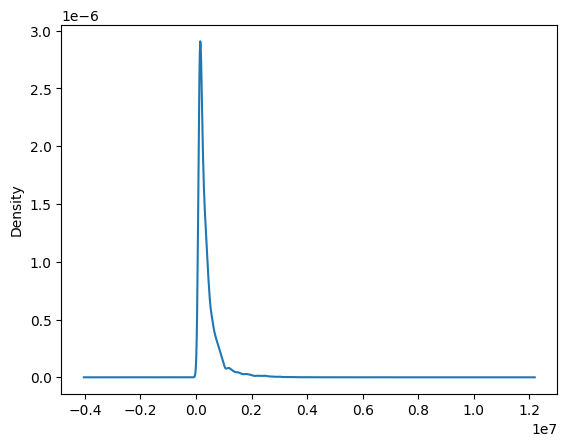

In [ ]:
#
# Función de densidad de precios en Madrid  de 0 a 1M€
#
ax = anuncios_madrid.PRICE.plot.kde()
plt.show()

Realizamos una winsorización

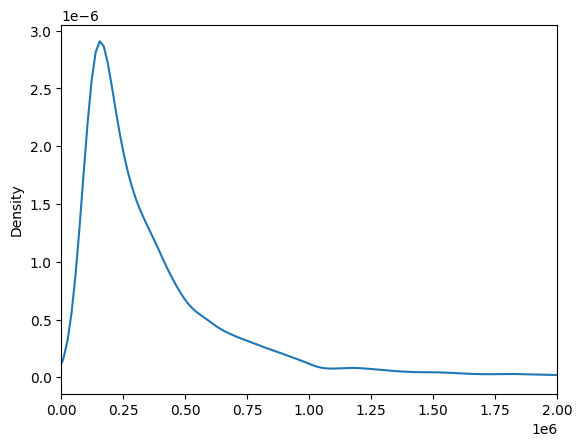

In [ ]:
#
# Función de densidad de precios en Madrid  de 0 a 1M€
#
ax = anuncios_madrid.PRICE.plot.kde()
plt.xlim([0, 2000000])
plt.show()

Probamos a cambiar de escala el precio, en este caso sin realizar ninguna transformación

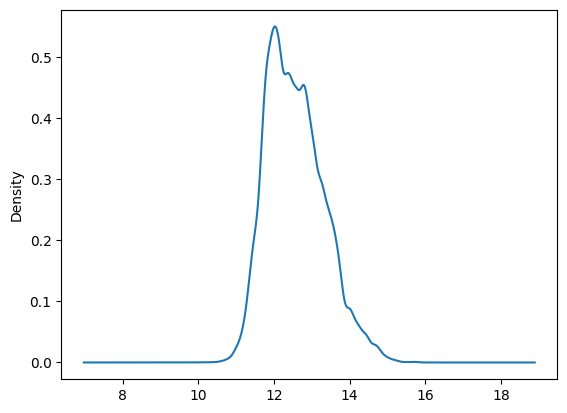

In [ ]:
anuncios_madrid['LOGPRICE'] = np.log(anuncios_madrid['PRICE'])
ax = anuncios_madrid.LOGPRICE.plot.kde()
plt.show()

Temas a tener en cuenta:

* La distribución de valores es multimodal
* La distribución de valores no es simétrica
* El rango de valores puede ser muy amplio

El precio depende de muchos factores, pero en la literatura existen dos grandes factores:

* Precio del suelo (el suelo donde está construido)
* Precio del vuelo (lo que está construido)

Para empezar, una forma de controlar el precio del suelo es incorporar información de la zona y una forma para controla el precio del suelo es normalizar por metros cuadrados (es nuestra variable __UNITPRICE__).

En la siguiente gráfica observamos el fenómeno de la multimodalidad, significa que podemos encontrarnos inmuebles con las mismas características constructivas con distintos precios €/m², ¿por qué?, principalmente por el otro factor: __el precio del suelo__.

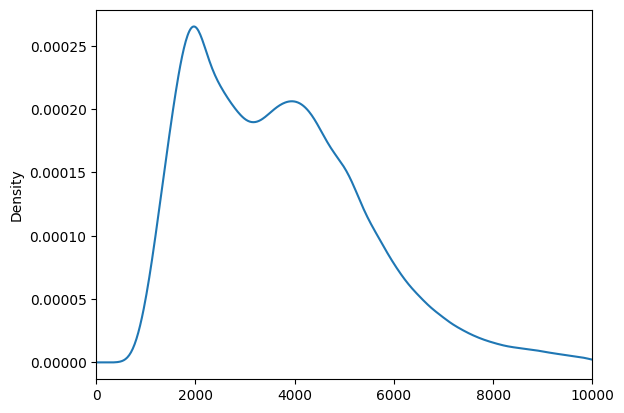

In [ ]:
#
# Función de densidad de precios en Madrid  de 0 a 1M€
#
ax = anuncios_madrid.UNITPRICE.plot.kde()
plt.xlim([0, 10000])
plt.show()

Mostramos los valores para Barcelona

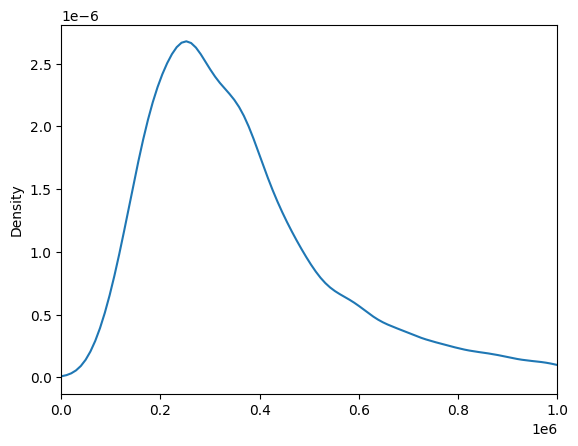

In [ ]:
#
# Función de densidad de precios en Barcelona  de 0 a 1M€
#
ax = anuncios_barcelona.PRICE.plot.kde()
plt.xlim([0, 1000000])
plt.show()


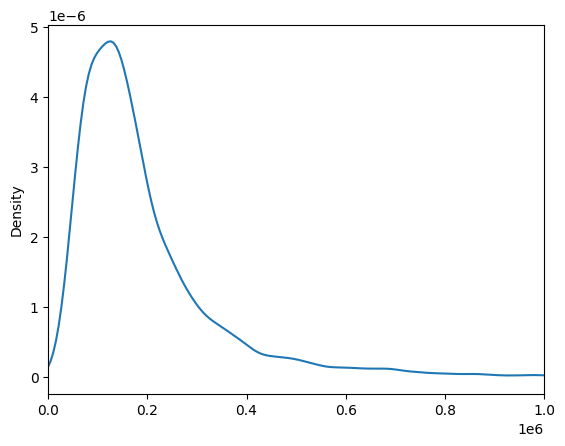

In [ ]:
#
# Función de densidad de precios en Valencia  de 0 a 1M€
#
ax = anuncios_valencia.PRICE.plot.kde()
plt.xlim([0, 1000000])
plt.show()

## Coordenadas
Mostramos las coordenadas sin proyectar del dataset como un scatterplot, usamos distintas intensidades de color para representar el nivel de precios.

Si vemos alguna anomalía en las coordenadas de alguna observación deberíamos eliminarla

### Valencia

Precio total

<ipython-input-50-53e277c480ca>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # or your colormap of choice


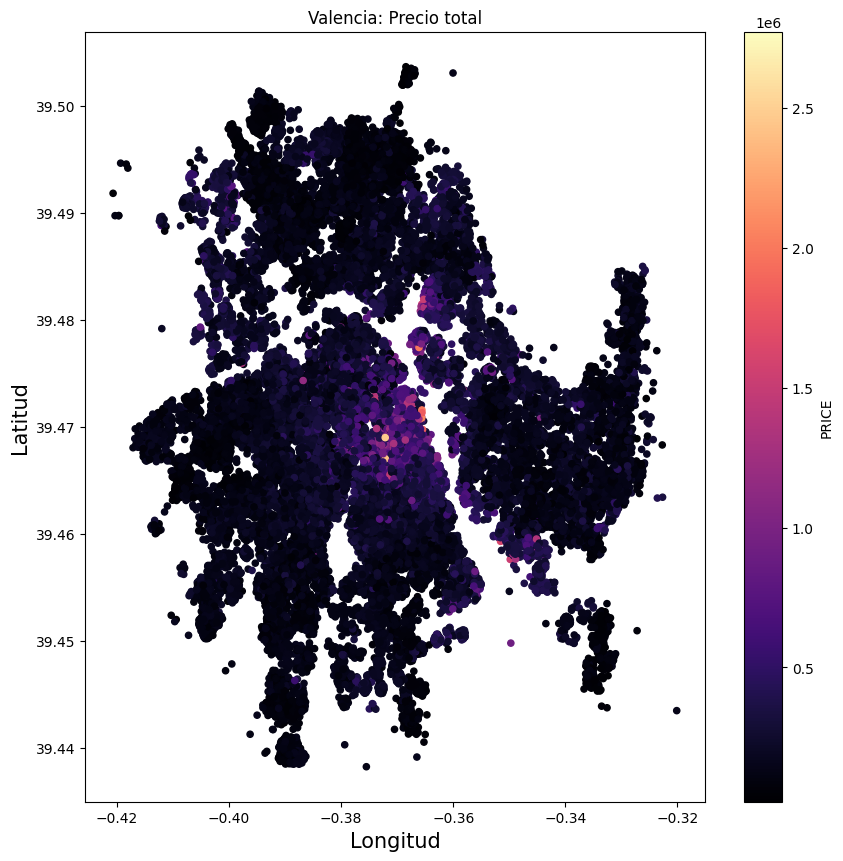

In [ ]:
cm = plt.cm.get_cmap('magma')  # or your colormap of choice

ax = anuncios_valencia.plot.scatter(x='LONGITUDE', y='LATITUDE', c='PRICE',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Valencia: Precio total')
ax.figure.show()

Precio €/m²

<ipython-input-51-7e18f8662687>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # or your colormap of choice


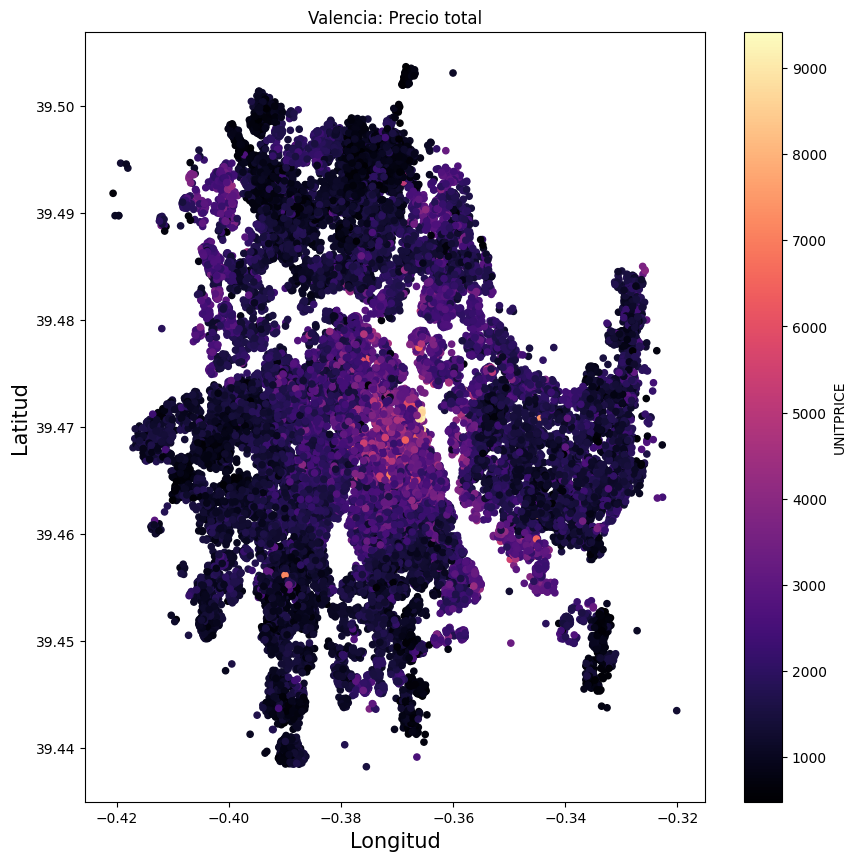

In [ ]:
cm = plt.cm.get_cmap('magma')  # or your colormap of choice

ax = anuncios_valencia.plot.scatter(x='LONGITUDE', y='LATITUDE', c='UNITPRICE',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Valencia: Precio total')
ax.figure.show()

### Madrid

Precio total en euros

<ipython-input-52-6ec8c6efcc09>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # or your colormap of choice


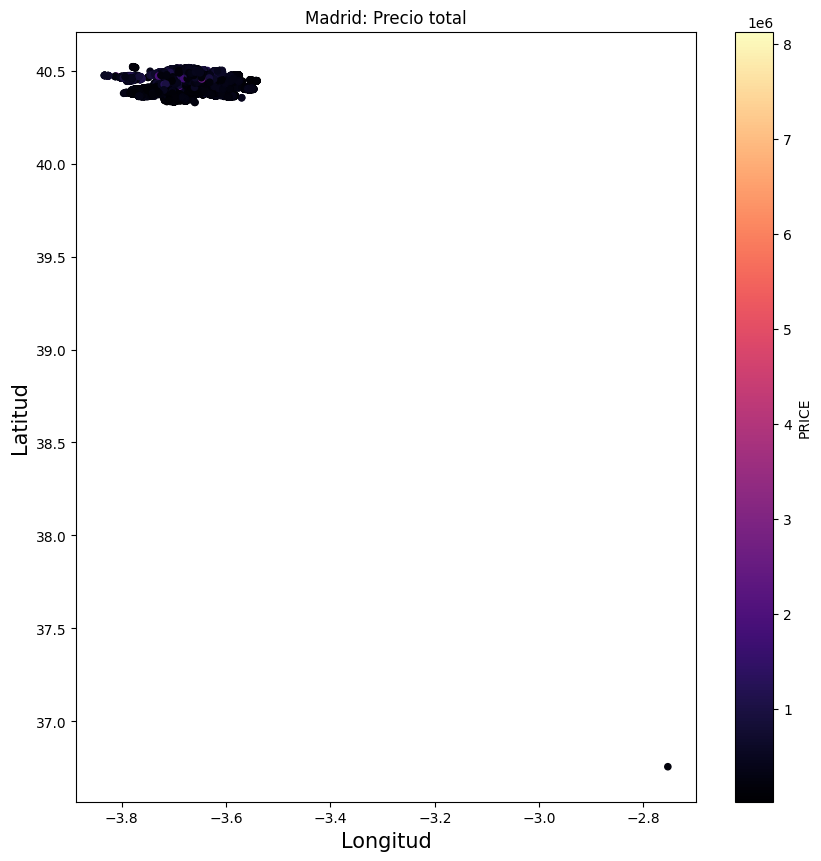

In [ ]:
cm = plt.cm.get_cmap('magma')  # or your colormap of choice

ax = anuncios_madrid.plot.scatter(x='LONGITUDE', y='LATITUDE', c='PRICE',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Madrid: Precio total')
ax.figure.show()

Precio €/m²

<ipython-input-53-13591d6a8fb1>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # or your colormap of choice


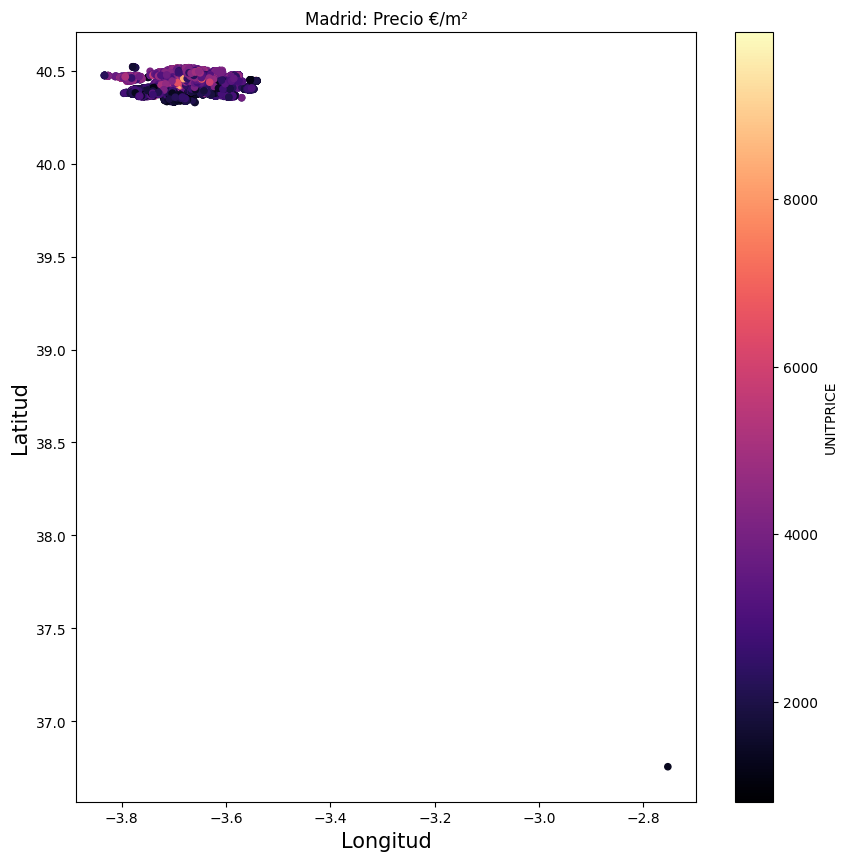

In [ ]:
cm = plt.cm.get_cmap('magma')  # or your colormap of choice

ax = anuncios_madrid.plot.scatter(x='LONGITUDE', y='LATITUDE', c='UNITPRICE',figsize=(10, 10), cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Madrid: Precio €/m²')
ax.figure.show()

### Barcelona

<ipython-input-54-0896e995f2c2>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # Mapa de colores


Text(0.5, 1.0, 'Barcelona: Precio total')

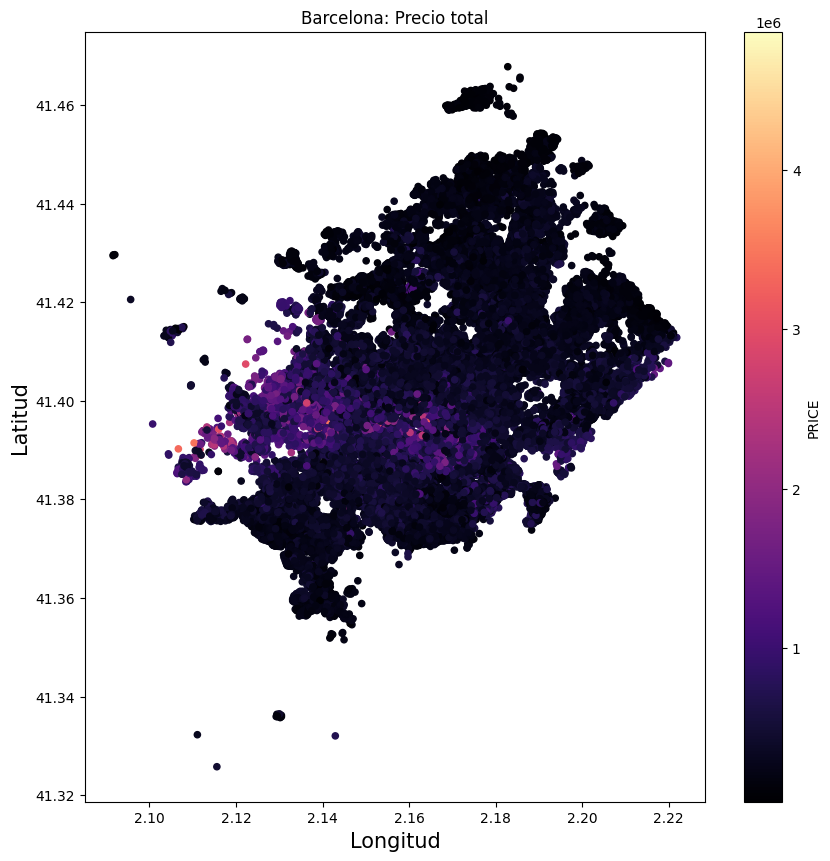

In [ ]:
cm = plt.cm.get_cmap('magma')  # Mapa de colores

ax = anuncios_barcelona.plot.scatter(x='LONGITUDE',
                                     y='LATITUDE',
                                     c='PRICE',
                                     figsize=(10, 10),
                                     cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Barcelona: Precio total')

Precio euros por metro cuadrado

<ipython-input-55-e397886462ec>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # Mapa de colores


Text(0.5, 1.0, 'Barcelona: Precio €/m²')

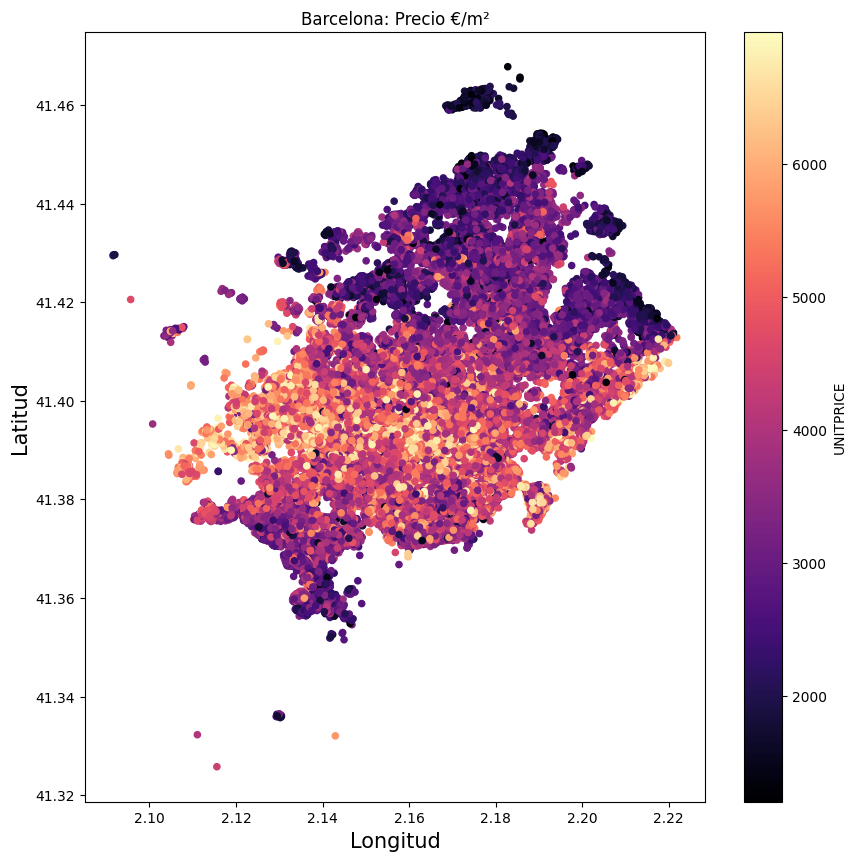

In [ ]:
cm = plt.cm.get_cmap('magma')  # Mapa de colores

ax = anuncios_barcelona.plot.scatter(x='LONGITUDE',
                                     y='LATITUDE',
                                     c='UNITPRICE',
                                     figsize=(10, 10),
                                     cmap=cm)
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Barcelona: Precio €/m²')

## Puntos de interés Open Street Map


Mostramos los datos de OSM

In [ ]:
osm_poi_barcelona = pd.read_csv('https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/osm/osm-pois-Barcelona.csv.gz', sep=";")
osm_poi_barcelona.head()

,ID,LAT,LNG,NOMBRE,CODE,SUBCODE
0,196628,41.376062,2.166253,Olimpia,SHOP,FLORIST
1,196629,41.376127,2.166234,Helena,SHOP,CONVENIENCE
2,196630,41.376228,2.166078,Spor Nuria,SHOP,MOTORCYCLE
3,196631,41.375983,2.166240,Els germans / The brothers,FOOD,CAFE
4,196632,41.376201,2.166117,Gran Vía 4,FOOD,CAFE


Mostramos dónde podemos encontrar las tiendas en la ciudad

<ipython-input-57-8ec452ed519f>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('magma')  # Mapa de colores


Text(0.5, 1.0, 'Presencia de shops')

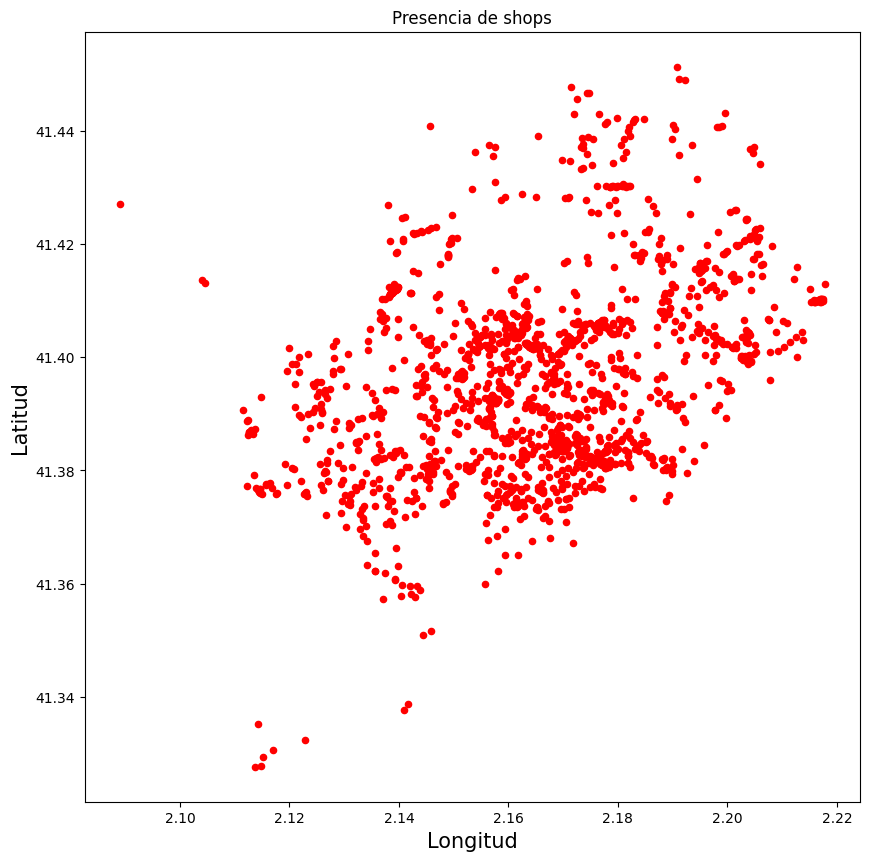

In [ ]:
cm = plt.cm.get_cmap('magma')  # Mapa de colores
shops = osm_poi_barcelona[osm_poi_barcelona['CODE'] == 'SHOP']
ax = shops.plot.scatter(x='LNG', y='LAT', c='red',figsize=(10, 10))
ax.set_xlabel('Longitud', fontsize=15)
ax.set_ylabel('Latitud', fontsize=15)
ax.set_title('Presencia de shops')

# Polígonos de zonas

Cargamos los polígonos de zonas idealista de la ciudad de Madrid

In [ ]:
url = 'https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/polygons/Madrid_polygons.csv.gz'
df_polygons = pd.read_csv(url, sep=";")
df_polygons.head()

,LOCATIONID,LOCATIONNAME,WKT,ZONELEVELID
0,0-EU-ES-28-07-001-079-16-002,Conde Orgaz-Piovera,"MULTIPOLYGON(((-3.63014 40.449394,-3.62633 40....",8
1,0-EU-ES-28-07-001-079-16-004,Pinar del Rey,"MULTIPOLYGON(((-3.655102 40.466807,-3.654251 4...",8
2,0-EU-ES-28-07-001-079-21-004,Timón,"MULTIPOLYGON(((-3.581744 40.479725,-3.60157 40...",8
3,0-EU-ES-28-07-001-079-01-001,Palacio,"MULTIPOLYGON(((-3.72044 40.42028,-3.72097 40.4...",8
4,0-EU-ES-28-07-001-079-01-003,Huertas-Cortes,"MULTIPOLYGON(((-3.696488 40.418813,-3.699685 4...",8


Calculamos los polígonos censales

In [ ]:
url = 'https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/ine/ine-censal-polygon-boundaries-2011-Madrid.csv.gz'
df_polygons_census = pd.read_csv(url, sep=";")
df_polygons_census.head()

,WKT,CUSEC,MUNICIPIO,PROVINCIA
0,MULTIPOLYGON (((-3.711132737747107 40.42074740...,2807901001,Madrid,Madrid
1,MULTIPOLYGON (((-3.710154641722698 40.42294258...,2807901002,Madrid,Madrid
2,MULTIPOLYGON (((-3.707941047158223 40.42153271...,2807901003,Madrid,Madrid
3,MULTIPOLYGON (((-3.710253548084378 40.42078881...,2807901004,Madrid,Madrid
4,MULTIPOLYGON (((-3.708153461055955 40.41905842...,2807901006,Madrid,Madrid


Creamos el geodataframe (geopandas) para los barrios:

In [ ]:
df_polygons['geometry'] = df_polygons['WKT'].apply(wkt.loads)
gdf_polygons = geopandas.GeoDataFrame(df_polygons['geometry'], crs='epsg:4326')
gdf_polygons['LOCATIONID'] = df_polygons['LOCATIONID']
gdf_polygons['LOCATIONNAME'] = df_polygons['LOCATIONNAME']

Y los polígonos censales

In [ ]:
df_polygons_census['geometry'] = df_polygons_census['WKT'].apply(wkt.loads)
gdf_polygons_census = geopandas.GeoDataFrame(df_polygons_census['geometry'], crs='epsg:4326')

# Añadimos el código de sección censal
gdf_polygons_census['CUSEC'] = df_polygons_census['CUSEC']

Y generamos ahora el geopandas con los precios por metro cuadrado

In [ ]:
a = anuncios_madrid[anuncios_madrid.LATITUDE > 40]
geometry = [Point(xy) for xy in zip(a.LONGITUDE, a.LATITUDE)]
df_prices = a.drop(['LONGITUDE', 'LATITUDE'], axis=1)
gdf_ads = GeoDataFrame(df_prices, crs="EPSG:4326", geometry=geometry)

Mostramos los valores de precios por barrios

<Axes: >

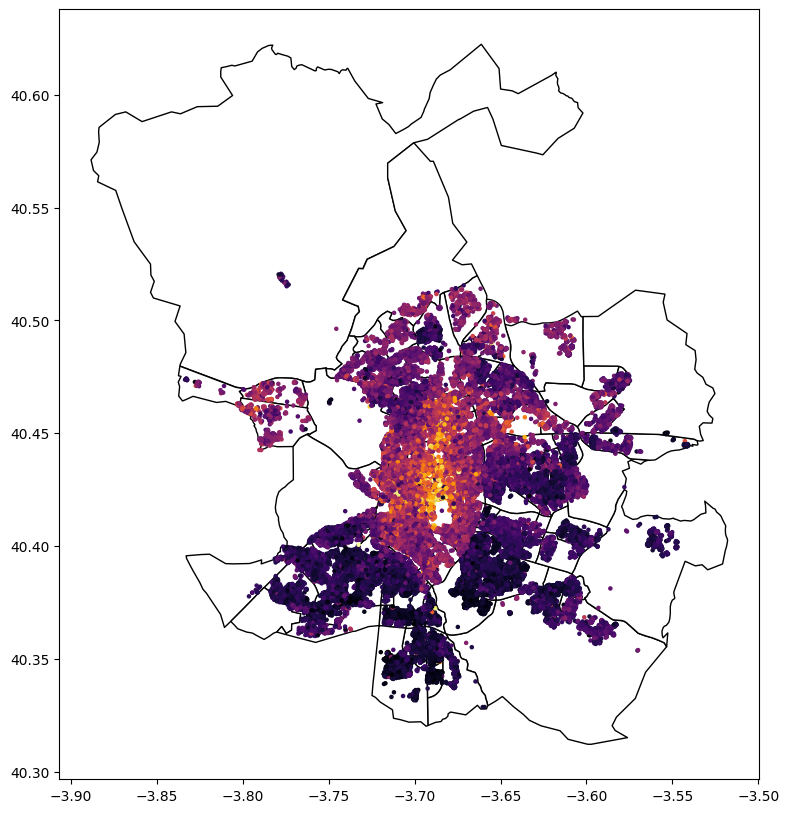

In [ ]:
#
# Mostramos los polígonos
#
base = gdf_polygons.plot(color='white', edgecolor='black', figsize=(10, 10))
gdf_ads.plot(ax=base, marker='o', column='UNITPRICE', markersize=5, cmap='inferno')

<Axes: >

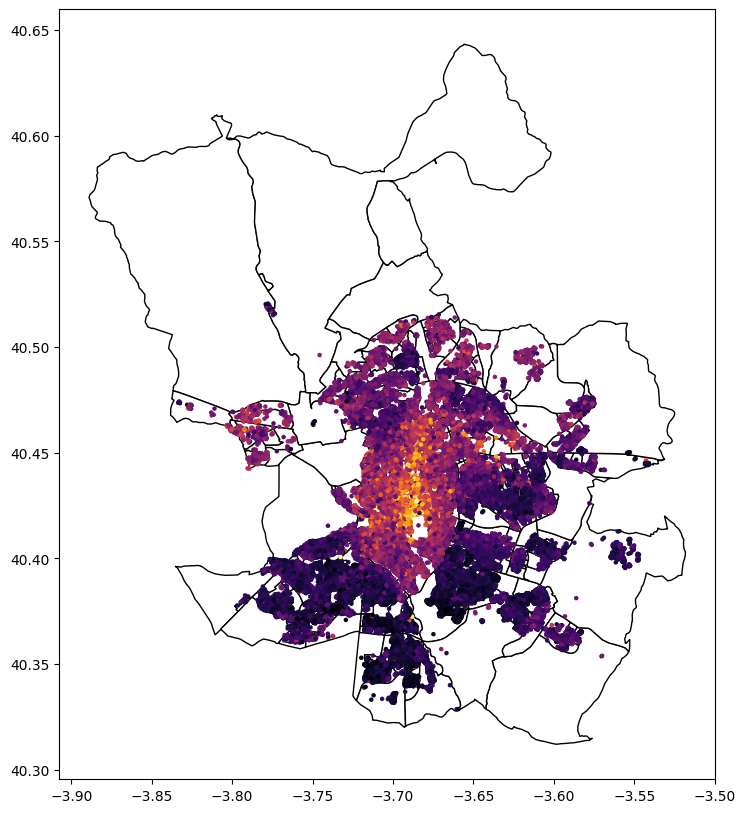

In [ ]:
#
# Mostramos los polígonos de secciones censales
#
base = gdf_polygons_census.plot(color='white', edgecolor='black', figsize=(10, 10))
gdf_ads.plot(ax=base, marker='o', column='UNITPRICE', markersize=5, cmap='inferno')

Cambiamos los precios totales una escala logarítmica (podríamos comparar que pasaría si lo hacemos sobre el precio total)

<Axes: >

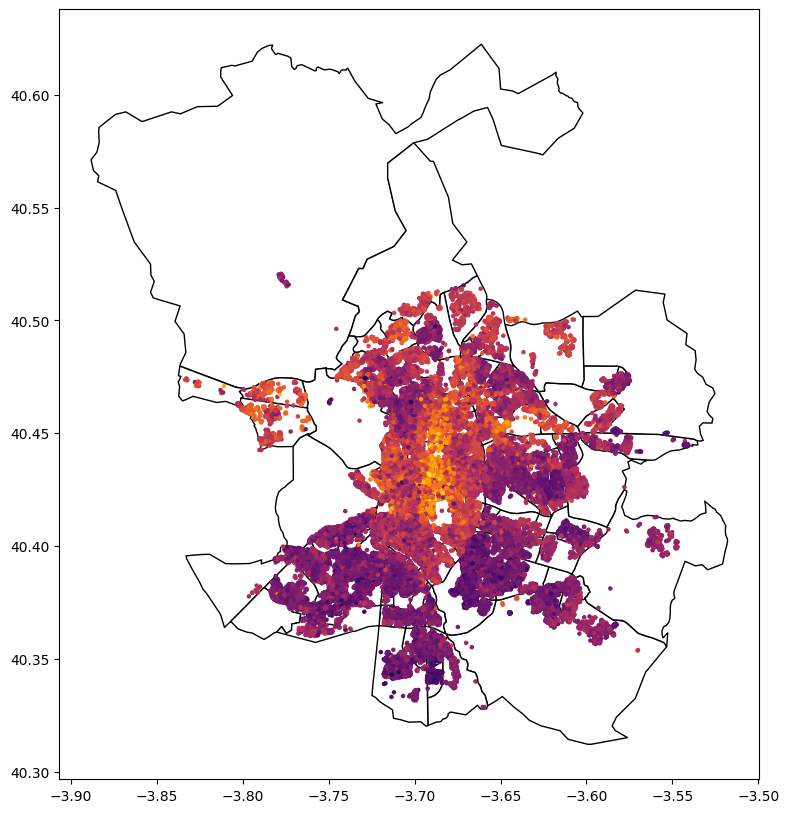

In [ ]:
#
# Mostramos los polígonos
#
gdf_ads['LOGPRICE'] = np.log(gdf_ads['PRICE'])
base = gdf_polygons.plot(color='white', edgecolor='black', figsize=(10, 10))
gdf_ads.plot(ax=base, marker='o', column='LOGPRICE', markersize=5, cmap='inferno')

## Cruce espacial

Hacemos el cruce espacial para añadir los códigos de zona

In [ ]:
# Añadimos los codigos censales (CUSEC)
gdf_join = geopandas.sjoin(gdf_ads, gdf_polygons_census, how="inner")
gdf_join = gdf_join.drop(columns=['index_right'])

# Ahora las zonas idealista (LOCATIONID, LOCATIONNAME)
gdf_join = geopandas.sjoin(gdf_join, gdf_polygons, how="inner")

Vemos como ya el ejemplo tiene los datos

In [ ]:
#gdf_join.columns
gdf_join[['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE','LOCATIONID', 'LOCATIONNAME', 'CUSEC']].head(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,LOCATIONID,LOCATIONNAME,CUSEC
0,A15019136831406238029,201803,126000,2680.851064,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
6648,A18358421103986858200,201803,210000,2413.793103,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
6649,A12760275757741995501,201803,207000,2379.310345,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
6652,A15624054548296987840,201803,176000,3142.857143,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
6657,A1152949908600176968,201803,236000,2712.643678,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
6669,A7181670765155239694,201803,392000,3213.114754,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
15121,A15254812312733429032,201803,187000,2200.000000,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
15125,A7514535067990852047,201803,153000,3000.000000,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
15130,A14207911720510699435,201803,202000,2376.470588,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190
15137,A9775773541096760734,201803,261000,3346.153846,0-EU-ES-28-07-001-079-11-008,Pau de Carabanchel,2807911190


Cálculo medio de zonas idealista

In [ ]:
# Calculamos los precios medios por zona
gdf_join.groupby(['LOCATIONID','LOCATIONNAME']).agg({'PRICE': ['median', 'mean','std'],
                                      'UNITPRICE': ['median', 'mean', 'count','std']}).reset_index()

LOCATIONID                      LOCATIONNAME     PRICE  \
                                                                       median   
0    0-EU-ES-28-07-001-079-01-001                           Palacio  395500.0   
1    0-EU-ES-28-07-001-079-01-002              Lavapiés-Embajadores  242000.0   
2    0-EU-ES-28-07-001-079-01-003                    Huertas-Cortes  504000.0   
3    0-EU-ES-28-07-001-079-01-004                   Chueca-Justicia  484500.0   
4    0-EU-ES-28-07-001-079-01-005              Malasaña-Universidad  335000.0   
..                            ...                               ...       ...   
130  0-EU-ES-28-07-001-079-21-001                  Alameda de Osuna  345000.0   
131  0-EU-ES-28-07-001-079-21-002                        Aeropuerto  112000.0   
132  0-EU-ES-28-07-001-079-21-003        Casco Histórico de Barajas  204000.0   
133  0-EU-ES-28-07-001-079-21-004                             Timón  254000.0   
134  0-EU-ES-28-07-001-079-21-005  Campo de las Naciones-Corralejos  421000.0   

                                     UNITPRICE                                  
              mean            std       median         mean count          std  
0    524512.208657  457936.978897  4837.907577  4904.750005  1802  1170.129099  
1    297275.296017  202015.555397  4310.512220  4385.326265  3716  1054.695642  
2    682833.486661  554870.043402  5250.000000  5354.220056  1087  1390.593404  
3    667059.720457  571869.163117  5743.975323  5902.022266  1574  1425.703651  
4    412446.643384  309032.942947  4976.377953  5066.962014  2577  1226.008514  
..             ...            ...          ...          ...   ...          ...  
130  370983.277592  146169.949312  3155.913978  3224.711073   299   575.156946  
131  121311.111111   65423.036748  1900.000000  1919.387322    45   501.151096  
132  220806.451613   68093.409120  2870.967742  2987.189730   217   797.284749  
133  270597.765363  116025.787503  3109.756098  3124.005848   179   668.764586  
134  446177.215190  169299.738676  3983.636364  3994.397157   158   697.404906  

[135 rows x 9 columns]

Resumen por secciones censales

In [ ]:
# Calculamos los precios medios por zona
gdf_join.groupby(['CUSEC']).agg({'PRICE': ['median', 'mean'],
                                      'UNITPRICE': ['median', 'mean', 'count']}).reset_index()


CUSEC     PRICE                   UNITPRICE                   
                    median           mean       median         mean count
0     2807901001  556000.0  869587.412587  5253.164557  5224.299151   143
1     2807901002  292500.0  416561.224490  4595.588235  4654.522362    98
2     2807901003  530000.0  573213.872832  5150.943396  5252.454037   173
3     2807901004  385500.0  537636.363636  4775.910900  4791.644837    88
4     2807901006  564000.0  701785.185185  5200.000000  5288.356458   135
...          ...       ...            ...          ...          ...   ...
2400  2807921026  236500.0  258264.705882  3092.948718  3154.491997    34
2401  2807921027  421000.0  467089.552239  3965.116279  3963.728862    67
2402  2807921028  517500.0  502724.299065  3563.377926  3589.004177   214
2403  2807921029  455500.0  514250.000000  4131.578947  3934.867446    24
2404  2807921030  257000.0  274529.411765  2987.500000  2914.192682    17

[2405 rows x 6 columns]

Montamos la unidad de drive

# Notas sobre el modelo a construir

Temas a tener en cuenta:

* La distribución de valores es multimodal
* La distribución de valores no es simétrica
* El rango de valores puede ser muy amplio

El precio depende de muchos factores, pero en la literatura existen dos grandes factores:

* Precio del suelo (el suelo donde está construido)
* Precio del vuelo (lo que está construido)

Para empezar, una forma de controlar el precio del suelo es incorporar información de la zona y una forma para controla el precio del suelo es normalizar por metros cuadrados (es nuestra variable __UNITPRICE__).

En la siguiente gráfica observamos el fenómeno de la multimodalidad, significa que podemos encontrarnos inmuebles con las mismas características constructivas con distintos precios €/m², ¿por qué?, principalmente por el otro factor: __el precio del suelo__.

¿Cómo se 'controla' la ubicación?, existen distintos enfoques principalmente dependientes del modelo a utilizar, pero por ejemplo:

* Dummies de zona (codigo de zonas), son variables que recogerán los precios de cada área.


# Notas sobre las variables

__FLOORCLEAN__: Indica la altura a la que está el piso (no siempre está informada), además se ha _winsorizado_ poniendo el menor valor -1 (por debajo del suelo) y 11 como planta 11 o superior

__FLATLOCATIONID__: Indica si el piso es interior o exterior (es posible que el usuario no haya indicado el valor, en este caso tendríamos un nulo).